In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive/')
test_ds=pd.read_csv('/content/drive/My Drive/test.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
from google.colab import drive
drive.mount('/content/drive/')
train_ds=pd.read_csv('/content/drive/My Drive/train.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
train_ds.shape
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       400 non-null    int64  
 1   CRIM     400 non-null    float64
 2   ZN       400 non-null    float64
 3   INDUS    400 non-null    float64
 4   CHAS     400 non-null    int64  
 5   NOX      400 non-null    float64
 6   RM       400 non-null    float64
 7   AGE      400 non-null    float64
 8   DIS      400 non-null    float64
 9   RAD      400 non-null    int64  
 10  TAX      400 non-null    float64
 11  PTRATIO  400 non-null    float64
 12  B        400 non-null    float64
 13  LSTAT    400 non-null    float64
 14  MEDV     400 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 47.0 KB


In [9]:
train_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,400.0,199.500000,115.614301,0.00000,99.75000,199.50000,299.250000,399.0000
CRIM,400.0,3.757191,9.155496,0.00906,0.07782,0.24217,3.543427,88.9762
ZN,400.0,10.970000,22.796261,0.00000,0.00000,0.00000,12.500000,95.0000
INDUS,400.0,10.936425,6.848042,0.46000,5.13000,8.56000,18.100000,27.7400
CHAS,400.0,0.072500,0.259639,0.00000,0.00000,0.00000,0.000000,1.0000
NOX,400.0,0.552817,0.115488,0.38500,0.44900,0.53200,0.624000,0.8710
RM,400.0,6.292165,0.709923,4.13800,5.87750,6.20850,6.620500,8.7800
AGE,400.0,68.086000,28.386888,2.90000,42.37500,76.95000,93.825000,100.0000
DIS,400.0,3.819462,2.132445,1.12960,2.10915,3.27210,5.214600,12.1265
RAD,400.0,9.462500,8.687478,1.00000,4.00000,5.00000,24.000000,24.0000


In [10]:
train_ds.drop('ID',inplace=True,axis=1)

In [11]:
train_ds.shape

(400, 14)

In [12]:
train_ds.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28,14.8
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21,25.0
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59,18.4
4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09,19.8
5,0.10659,80.0,1.91,0,0.413,5.936,19.5,10.5857,4,334.0,22.0,376.04,5.57,20.6
6,51.13580,0.0,18.10,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11,15.0
7,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403.0,14.7,396.90,26.82,13.4
8,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58,23.1
9,0.24522,0.0,9.90,0,0.544,5.782,71.7,4.0317,4,304.0,18.4,396.90,15.94,19.8


In [13]:
train_ds.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
train_ds.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.193548,0.409972,-0.060591,0.422635,-0.205928,0.353379,-0.376323,0.618538,0.577501,0.284967,-0.357581,0.442743,-0.393693
ZN,-0.193548,1.000000,-0.522218,-0.037318,-0.497638,0.290127,-0.554214,0.659949,-0.301067,-0.300221,-0.369974,0.161515,-0.402116,0.336805
INDUS,0.409972,-0.522218,1.000000,0.075305,0.759132,-0.396865,0.631742,-0.695199,0.608088,0.731619,0.370383,-0.338007,0.624374,-0.502898
CHAS,-0.060591,-0.037318,0.075305,1.000000,0.084020,0.091267,0.083314,-0.102016,-0.023792,-0.045183,-0.137556,0.040732,-0.055326,0.182096
NOX,0.422635,-0.497638,0.759132,0.084020,1.000000,-0.283907,0.736349,-0.768775,0.602960,0.657875,0.154693,-0.382202,0.622209,-0.434271
RM,-0.205928,0.290127,-0.396865,0.091267,-0.283907,1.000000,-0.198918,0.171596,-0.190030,-0.277064,-0.336408,0.120518,-0.634758,0.721489
AGE,0.353379,-0.554214,0.631742,0.083314,0.736349,-0.198918,1.000000,-0.750408,0.457339,0.499478,0.234894,-0.274650,0.593788,-0.354106
DIS,-0.376323,0.659949,-0.695199,-0.102016,-0.768775,0.171596,-0.750408,1.000000,-0.492090,-0.520442,-0.185938,0.274036,-0.503383,0.235087
RAD,0.618538,-0.301067,0.608088,-0.023792,0.602960,-0.190030,0.457339,-0.492090,1.000000,0.911103,0.458930,-0.395845,0.503532,-0.386922
TAX,0.577501,-0.300221,0.731619,-0.045183,0.657875,-0.277064,0.499478,-0.520442,0.911103,1.000000,0.450978,-0.400353,0.552239,-0.479308


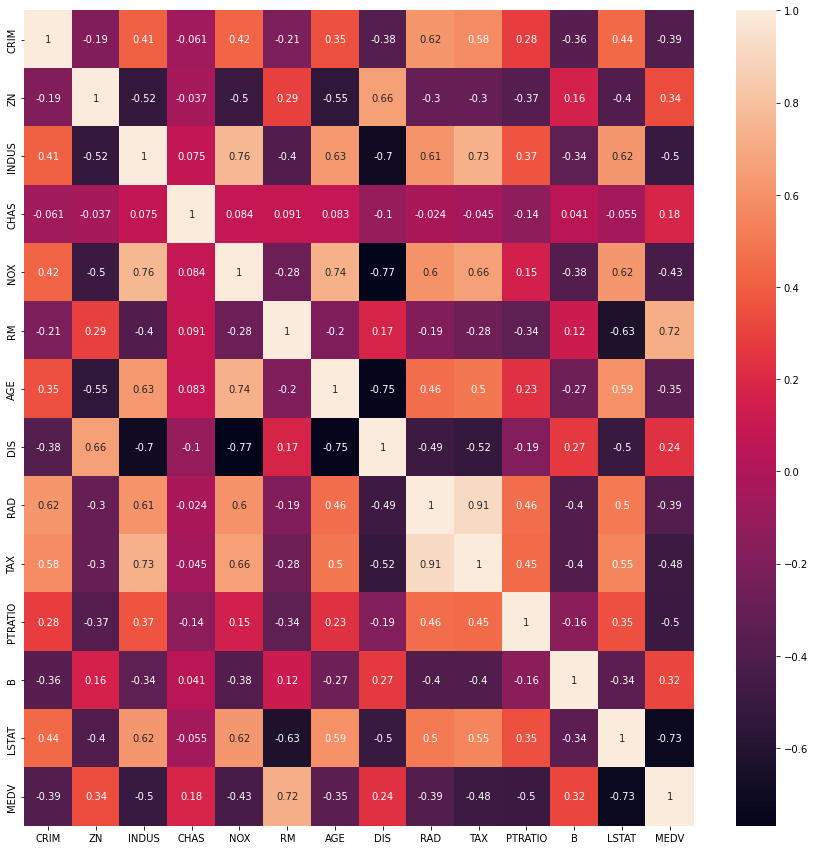

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(train_ds.corr(),annot=True) #annot gives yu the value
plt.show()

In [16]:
X=train_ds.iloc[:,0:13]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.95577,0.0,8.14,0,0.538,6.047,88.8,4.4534,4,307.0,21.0,306.38,17.28
1,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,396.33,6.21
2,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59
3,5.66637,0.0,18.10,0,0.740,6.219,100.0,2.0048,24,666.0,20.2,395.69,16.59
4,0.04544,0.0,3.24,0,0.460,6.144,32.2,5.8736,4,430.0,16.9,368.57,9.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.03615,80.0,4.95,0,0.411,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70
396,0.17505,0.0,5.96,0,0.499,5.966,30.2,3.8473,5,279.0,19.2,393.43,10.13
397,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666.0,20.2,396.90,13.99
398,0.13117,0.0,8.56,0,0.520,6.127,85.2,2.1224,5,384.0,20.9,387.69,14.09


In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [19]:
y = np.round(train_ds['MEDV'])
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X.columns)
ColumnScores = pd.concat([columns,scores],axis=1)
ColumnScores.columns = ["Column Name","Score"] 
ColumnScores

,Column Name,Score
0,CRIM,5008.889167
1,ZN,4663.607510
2,INDUS,751.483922
3,CHAS,51.706958
4,NOX,4.618684
5,RM,18.945818
6,AGE,2043.608944
7,DIS,141.060963
8,RAD,1178.002558
9,TAX,12353.034176


In [20]:
print(ColumnScores.nlargest(5,"Score"))

   Column Name         Score
9          TAX  12353.034176
0         CRIM   5008.889167
1           ZN   4663.607510
11           B   2526.039453
6          AGE   2043.608944


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [23]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 13)
(300,)
(100, 13)
(100,)


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [26]:
coeff = pd.DataFrame(model.coef_,X.columns)
coeff.columns = ['coefficients']
coeff

,coefficients
CRIM,-0.123791
ZN,0.038755
INDUS,-0.009606
CHAS,2.836366
NOX,-17.462052
RM,4.512105
AGE,-0.003992
DIS,-1.388289
RAD,0.298330
TAX,-0.012957


In [27]:
pred=model.predict(X_test)
pred

array([13.90875161, 19.83688978, 24.71350069, 25.69602732, 19.23504171,
       22.8139866 , 22.92520639, 13.7188355 , 22.02008207, 17.9326655 ,
       31.81641782, 22.59640061, 38.90445145, 22.62512656, 22.38198549,
       23.09194611, 20.91330812, 16.45170633, 23.13761009, 31.33612167,
       22.66417531, 13.63135644, 25.0652248 , 25.87805859, 31.85210785,
       24.80916526, 24.18293096, 10.22608448, 27.24308544, 20.70006827,
       18.18452631, 17.10551372, 23.8877661 , 23.8189742 , 23.10625268,
       24.86359609, 24.94915841, 17.15875865, 21.32243341, 28.50872077,
       27.82317288, 24.52678066, 13.33501528, 28.27834328,  7.09676524,
       20.47417062, 22.84265956, 17.51316812, 21.93047531, 30.63529179,
       15.92636975, 22.93880588, 22.56238168, 28.61202965, 17.2132504 ,
       23.09289861, 18.72384166, 41.49316319, 19.93893022, 17.77593304,
       27.27761819, 16.92784087, 21.63574451, 28.27151905, 20.51793318,
       19.2809864 , 22.16436959, 16.33751013, 23.89375637, 14.61

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
print("Mean Absolute Error:",mean_absolute_error(y_test, pred))
print("Mean Squared Error:",mean_squared_error(y_test, pred))
print("R2 Score:",r2_score(y_test, pred))

Mean Absolute Error: 2.5785279305837205
Mean Squared Error: 10.585726531308472
R2 Score: 0.7863967897891462


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
crossVal = cross_val_score(model, X, y, scoring='r2', cv=10)
crossVal

array([0.81180336, 0.51282725, 0.83623968, 0.6318728 , 0.73476937,
       0.7441422 , 0.741768  , 0.56790869, 0.77373279, 0.79447893])

In [32]:
print(crossVal.mean())

0.7149543052071896


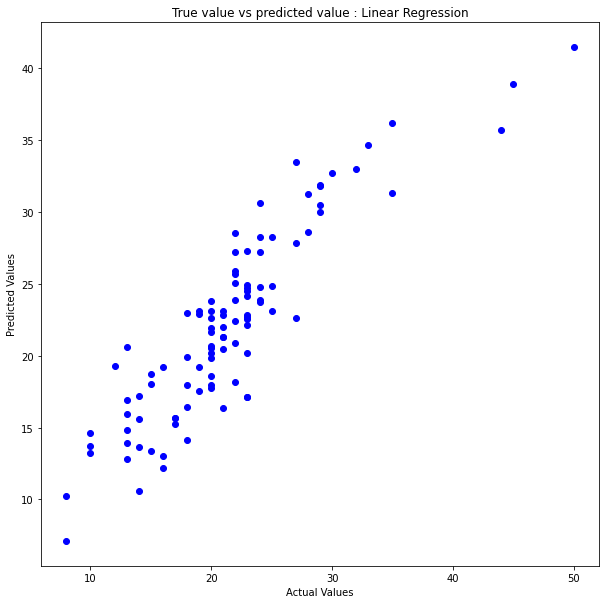

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c = 'blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("True value vs predicted value : Linear Regression")
plt.show()